<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-18 18:39:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  45.4MB/s    in 0.8s    

2024-06-18 18:39:33 (45.4 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [23]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [25]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [100]:
QUERY = """
SELECT *
FROM DevType
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [4]:

# your code goes here
QUERY = """
SELECT *
FROM LanguageDesireNextYear 
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df
#df['LanguageDesireNextYear'].value_counts()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


# Hands-on Lab


## Visualizing distribution of data


Plot a histogram of `ConvertedComp.`


### Histograms


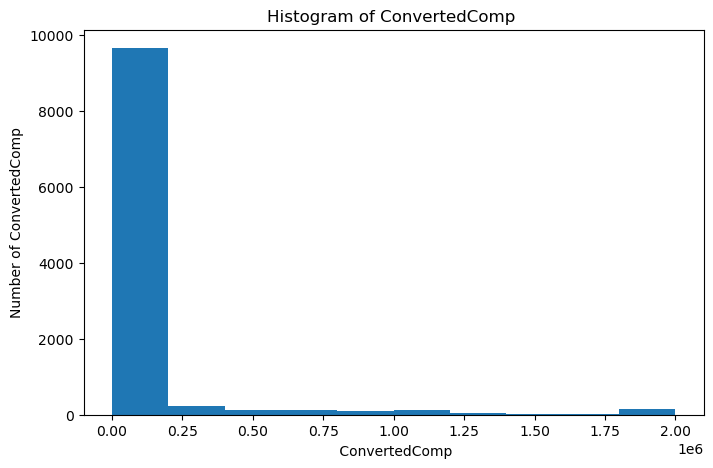

In [11]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Histogram of ConvertedComp ')
# add y-label
plt.ylabel('Number of ConvertedComp')
# add x-label
plt.xlabel(' ConvertedComp')

plt.show()

In [26]:

# your code goes here
QUERY = """
SELECT *
FROM DatabaseWorkedWith 
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df
# Find respondents who work with 'MySQL'
mysql_respondents = df[df['DatabaseWorkedWith'] == 'MySQL']['Respondent'].unique()

# Find respondents who work with any other database
other_db_respondents = df[df['DatabaseWorkedWith'] != 'MySQL']['Respondent'].unique()

# Find respondents who work with 'MySQL' only
mysql_only_respondents = set(mysql_respondents) - set(other_db_respondents)

# Count the number of respondents who work on 'MySQL' only
mysql_only_count = len(mysql_only_respondents)

# Print the number of respondents who work on 'MySQL' only
print(f"Number of respondents who work on 'MySQL' only: {mysql_only_count}")

Number of respondents who work on 'MySQL' only: 474


In [33]:

# Your SQL query to fetch data
QUERY = """
SELECT *
FROM DatabaseWorkedWith 
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql_query(QUERY, conn)
df['DatabaseWorkedWith']
# Filter rows where DatabaseWorkedWith includes 'SQL'
sql_respondents = df[df['DatabaseWorkedWith'].str.contains('PostgreSQL', case=False, na=False)]

# Count unique respondents who work with 'SQL'
sql_respondents_count = sql_respondents['Respondent'].nunique()

# Print the number of respondents who work with 'SQL'
print(f"Number of respondents who work with 'SQL': {sql_respondents_count}")

Number of respondents who work with 'SQL': 4097


### Box Plots


Plot a box plot of `Age.`


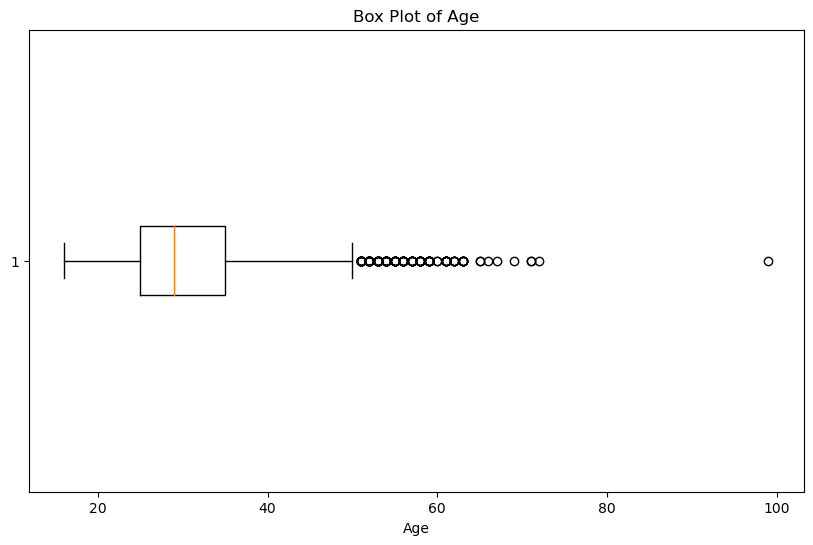

In [13]:

# your code goes here
QUERY = """
SELECT Age
FROM master 
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


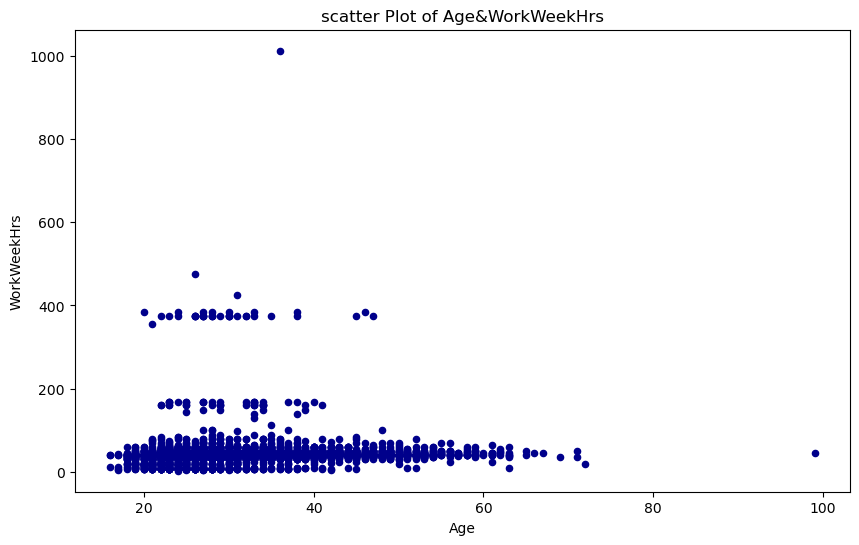

In [73]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'],df['WorkWeekHrs'],marker='o',s = 20,color='darkblue')
plt.title('scatter Plot of Age&WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()


In [74]:
df[['Age','WorkWeekHrs']].corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


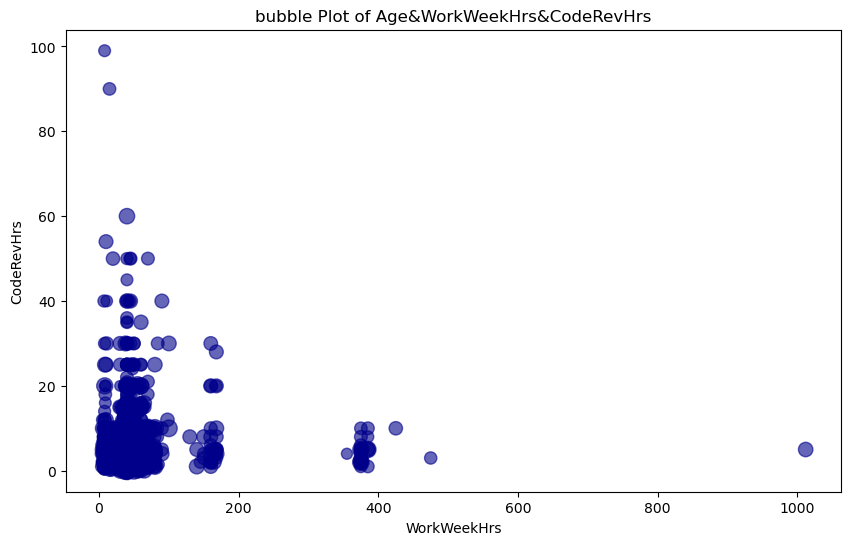

In [21]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
size=df['Age']
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'],s=size*3,marker='o',color='darkblue', alpha=0.6)
plt.title('bubble Plot of Age&WorkWeekHrs&CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


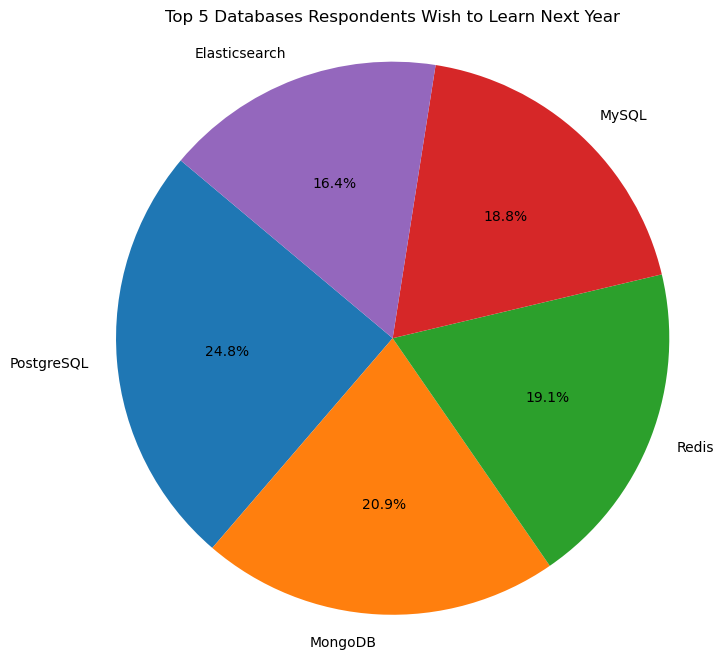

In [30]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
database_counts=df['DatabaseDesireNextYear'].value_counts()
top_databases=database_counts.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


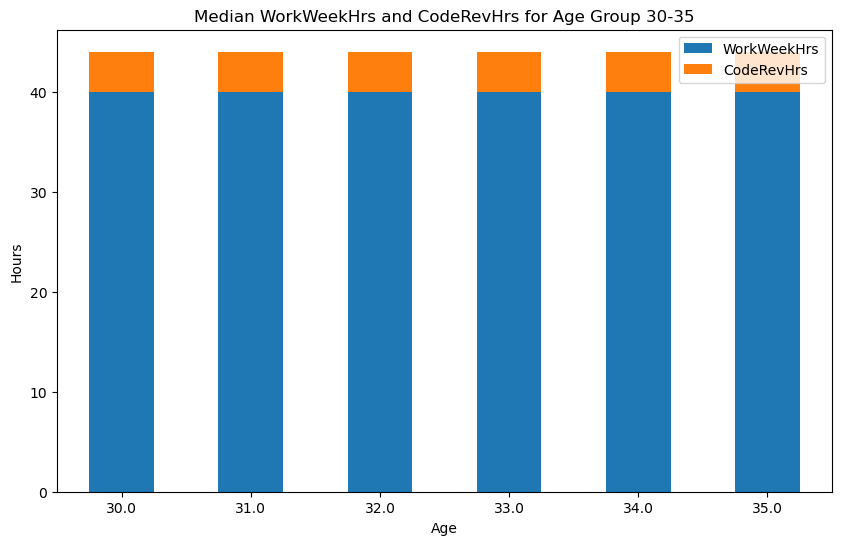

In [40]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master where Age>=30 and Age<=35

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
median_values=df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
median_values.plot(kind='bar',stacked=True, figsize=(10, 6))
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.xticks(rotation=0)
plt.legend(['WorkWeekHrs', 'CodeRevHrs'])
plt.show()

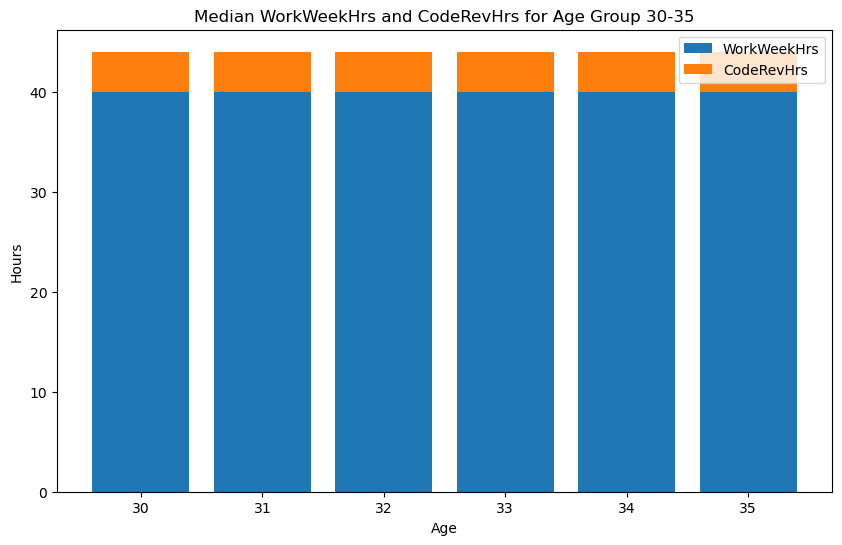

In [41]:
ages = median_values.index
work_week_hours = median_values['WorkWeekHrs']
code_rev_hours = median_values['CodeRevHrs']

# Plotting the stacked bar chart using matplotlib
plt.figure(figsize=(10, 6))

# Plotting WorkWeekHrs
plt.bar(ages, work_week_hours, label='WorkWeekHrs')

# Plotting CodeRevHrs on top of WorkWeekHrs to stack them
plt.bar(ages, code_rev_hours, bottom=work_week_hours, label='CodeRevHrs')

# Adding labels and title
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.xticks(ages)
plt.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


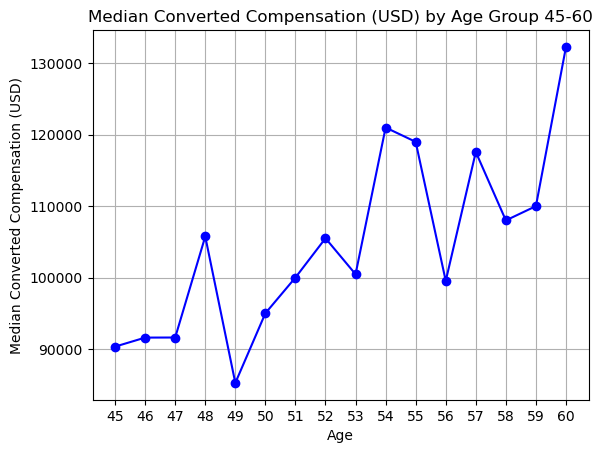

In [53]:

# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master where Age>=45 and Age<=60

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
median_conver=df.groupby('Age')['ConvertedComp'].median()
plt.plot(median_conver.index,median_conver.values,marker='o', linestyle='-', color='b')
plt.title('Median Converted Compensation (USD) by Age Group 45-60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation (USD)')
plt.grid(True)
plt.xticks(median_conver.index)
plt.show()

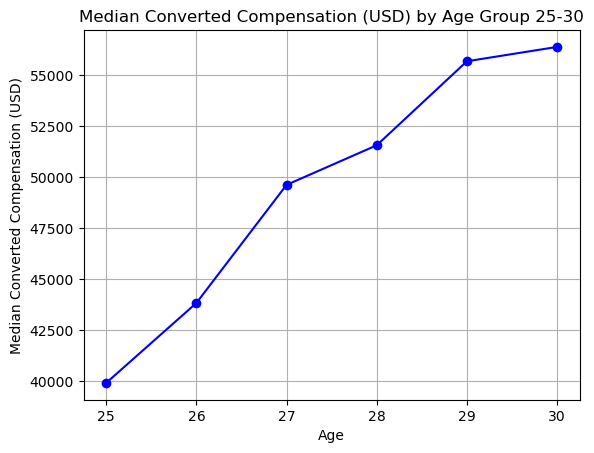

In [101]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master where Age>=25 and Age<=30

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
median_conver=df.groupby('Age')['ConvertedComp'].median()
plt.plot(median_conver.index,median_conver.values,marker='o', linestyle='-', color='b')
plt.title('Median Converted Compensation (USD) by Age Group 25-30')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation (USD)')
plt.grid(True)
plt.xticks(median_conver.index)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<BarContainer object of 2 artists>

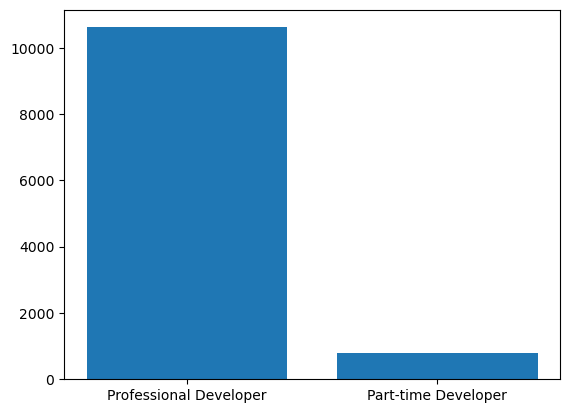

In [67]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
mainbranch_bar=df['MainBranch'].value_counts()
mainbranch_bar
custom_labels = {
    'I am a developer by profession': 'Professional Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Part-time Developer',
    # Add more custom labels as needed for other MainBranch categories
}
mainbranch_bar.index=mainbranch_bar.index.map(custom_labels.get)
plt.bar(mainbranch_bar.index,mainbranch_bar.values)


Close the database connection.


In [68]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
